In [1]:
# Re-import the pandas package and read the dataset again using the whitespace delimiter

import pandas as pd

# File path
dataset_path = 'SouthGermanCredit.asc'

# Read the dataset with whitespace delimiter
dataset = pd.read_csv(dataset_path, delim_whitespace=True)

# Display the first few rows of the dataset
dataset.head()


/tmp/ipykernel_9226/4005940225.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
/tmp/ipykernel_9226/4005940225.py:9: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dataset = pd.read_csv(dataset_path, delim_whitespace=True)


,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1


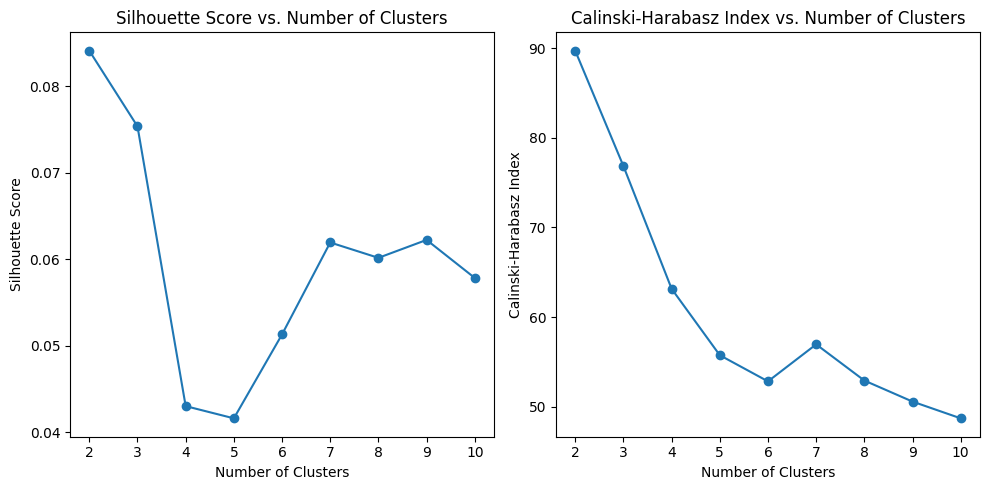

In [4]:
"""
Обе метрики указывают на то, что два кластера являются оптимальным числом для этого набора данных, так как при этом значении наблюдается наибольшая силуэтная оценка и наивысший индекс Калински-Харабаса. Это означает, что два кластера обеспечивают лучшее разделение данных с точки зрения плотности и отделимости.

"""


from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score
import matplotlib.pyplot as plt

# We'll first need to scale our data
scaler = StandardScaler()
dataset_scaled = scaler.fit_transform(dataset.drop('kredit', axis=1))  # Drop the target variable for clustering

# Define the range of clusters to try
cluster_range = range(2, 11)

# Initialize lists to store the metrics for each number of clusters
silhouette_scores = []
calinski_harabasz_scores = []

# Train multiple models using different numbers of clusters
for n_clusters in cluster_range:
    # Train the KMeans model
    kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(dataset_scaled)

    # Calculate the silhouette score (the mean silhouette coefficient over all samples)
    silhouette_avg = silhouette_score(dataset_scaled, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)

    # Calculate the Calinski-Harabasz index (variance ratio criterion)
    calinski_harabasz_avg = calinski_harabasz_score(dataset_scaled, kmeans.labels_)
    calinski_harabasz_scores.append(calinski_harabasz_avg)

# Plotting the silhouette scores
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title('Silhouette Score vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

# Plotting the Calinski-Harabasz index
plt.subplot(1, 2, 2)
plt.plot(cluster_range, calinski_harabasz_scores, marker='o')
plt.title('Calinski-Harabasz Index vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Calinski-Harabasz Index')

plt.tight_layout()
plt.show()


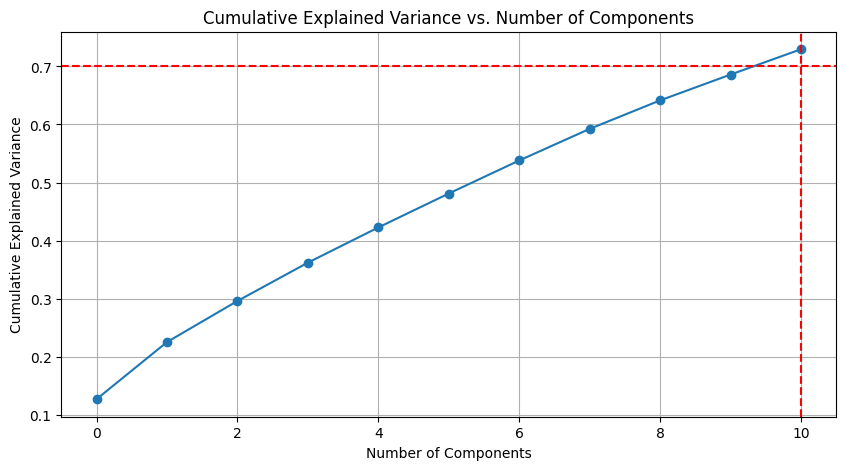

(11, 0.7295964949294494)

In [5]:
# Re-import necessary libraries due to reset in the environment
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Perform PCA to reduce dimensionality while retaining 70% of the information
pca = PCA(n_components=0.70, random_state=42)
dataset_reduced = pca.fit_transform(dataset_scaled)

# Calculate the explained variance ratio for the reduced dataset
explained_variance_ratio_reduced = np.cumsum(pca.explained_variance_ratio_)

# Find the number of components that explain at least 70% of the variance
optimal_components = len(explained_variance_ratio_reduced)

# Plotting the cumulative sum of explained variance for the reduced data
plt.figure(figsize=(10, 5))
plt.plot(explained_variance_ratio_reduced, marker='o')
plt.title('Cumulative Explained Variance vs. Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.axhline(y=0.70, color='r', linestyle='--')
plt.axvline(x=optimal_components - 1, color='r', linestyle='--')
plt.show()

optimal_components, explained_variance_ratio_reduced[optimal_components - 1]


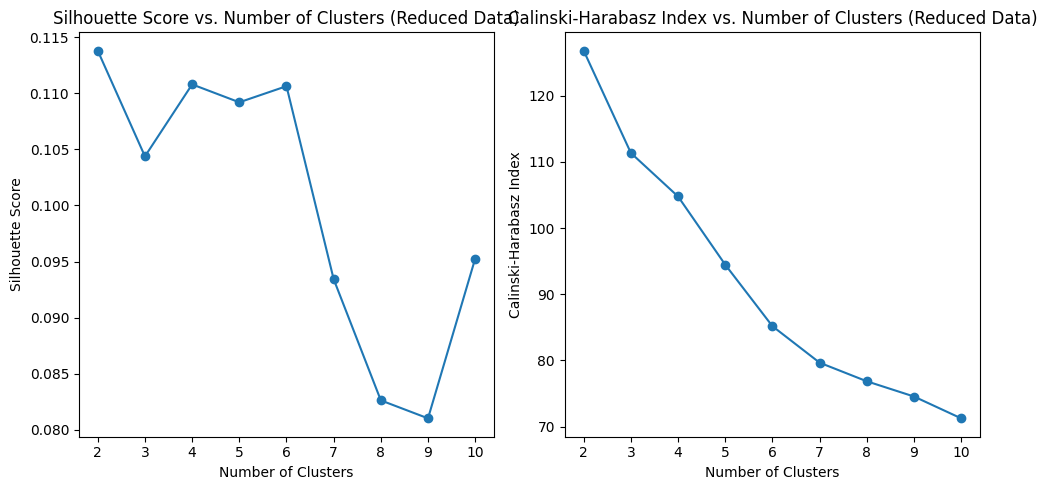

In [6]:
# Repeating the clustering process for the reduced dataset

# Initialize lists to store the metrics for each number of clusters
silhouette_scores_reduced = []
calinski_harabasz_scores_reduced = []

# Train multiple models using different numbers of clusters
for n_clusters in cluster_range:
    # Train the KMeans model
    kmeans_reduced = KMeans(n_clusters=n_clusters, random_state=42).fit(dataset_reduced)

    # Calculate the silhouette score (the mean silhouette coefficient over all samples)
    silhouette_avg_reduced = silhouette_score(dataset_reduced, kmeans_reduced.labels_)
    silhouette_scores_reduced.append(silhouette_avg_reduced)

    # Calculate the Calinski-Harabasz index (variance ratio criterion)
    calinski_harabasz_avg_reduced = calinski_harabasz_score(dataset_reduced, kmeans_reduced.labels_)
    calinski_harabasz_scores_reduced.append(calinski_harabasz_avg_reduced)

# Plotting the silhouette scores for the reduced dataset
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(cluster_range, silhouette_scores_reduced, marker='o')
plt.title('Silhouette Score vs. Number of Clusters (Reduced Data)')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

# Plotting the Calinski-Harabasz index for the reduced dataset
plt.subplot(1, 2, 2)
plt.plot(cluster_range, calinski_harabasz_scores_reduced, marker='o')
plt.title('Calinski-Harabasz Index vs. Number of Clusters (Reduced Data)')
plt.xlabel('Number of Clusters')
plt.ylabel('Calinski-Harabasz Index')

plt.tight_layout()
plt.show()
